### Predictive Model for Car Dealership

In [60]:
import os 
from os.path import curdir
import pandas as pd
from sklearn import set_config
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd,numpy as np,seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pycaret.regression import *

#Set maximun numbers of display columns
pd.set_option('display.max_columns', 50)

data_path = os.path.join(curdir,'Data','UK_used_car_cleaned.xlsx')
cars_data = pd.read_excel(data_path,sheet_name="Sheet1")

#Rename the column for a better understanding
cars_data.rename(columns={"source": "brand"}, inplace=True)

#Looking the data
cars_data.head(3)

,Obs,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,1,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,vauxhall
1,2,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,vauxhall
2,3,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,vauxhall


### Exploratory Data Analysis (EDA)

In [61]:
#Check types of the columns
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97710 entries, 0 to 97709
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Obs           97710 non-null  int64  
 1   model         97710 non-null  object 
 2   year          97710 non-null  int64  
 3   price         97710 non-null  int64  
 4   transmission  97710 non-null  object 
 5   mileage       97710 non-null  int64  
 6   fuelType      97710 non-null  object 
 7   tax           97710 non-null  int64  
 8   mpg           97710 non-null  float64
 9   engineSize    97710 non-null  float64
 10  brand         97710 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.2+ MB


In [62]:
#Check null values
cars_data.isnull().sum()

Obs             0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

### Correlation Heatmap

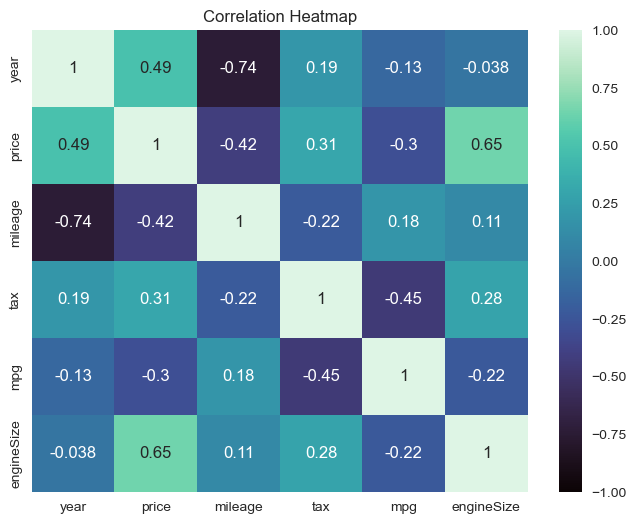

In [63]:
# Getting the Correlation Heatmap
numeric = ['year','price','mileage','tax','mpg','engineSize']
corr = cars_data[numeric].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

### Univariate Analysis 

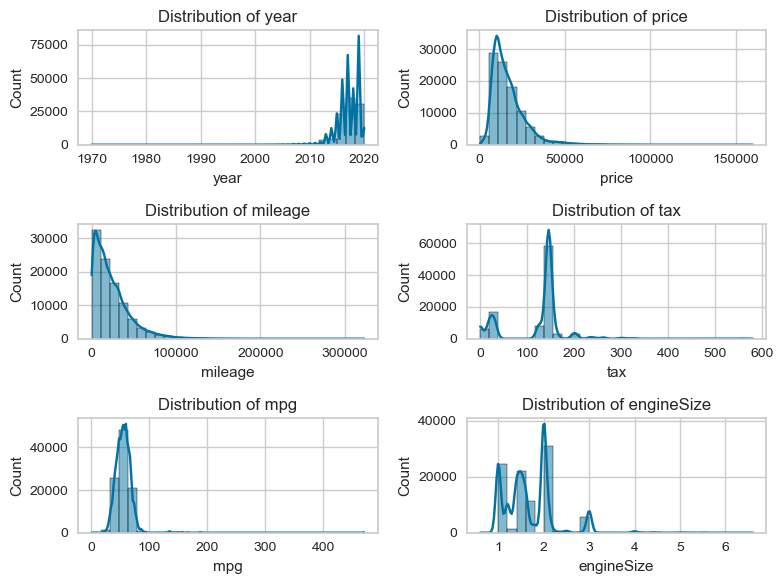

In [64]:
# Define numerical features
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

# Distribution of Numerical Features
fig, axes = plt.subplots(3, 2, figsize=(8, 6))

for i, feature in enumerate(numerical_features):
    sns.histplot(cars_data[feature], bins=30, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

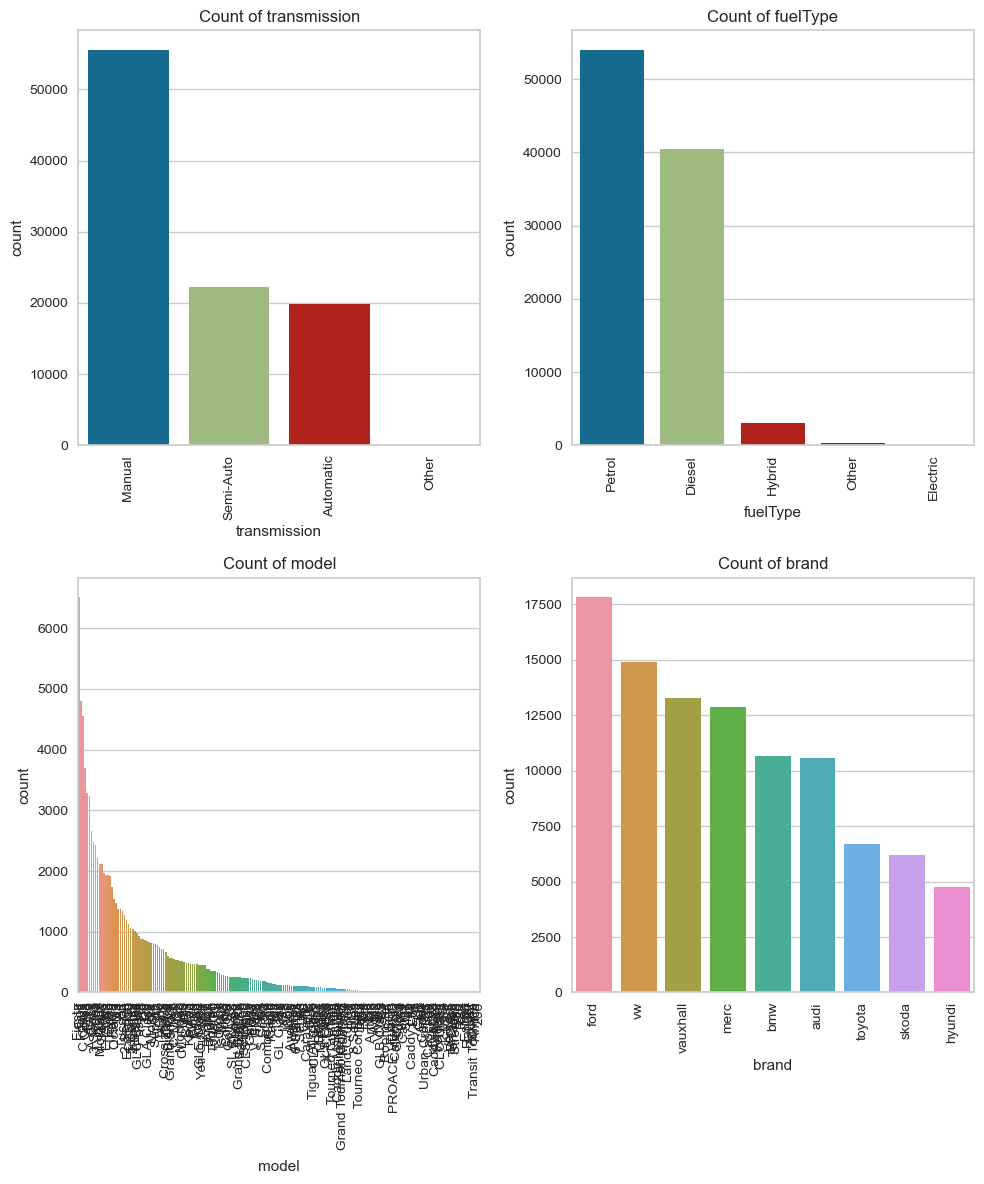

In [65]:
# Define categorical features
categorical_features = ['transmission', 'fuelType', 'model', 'brand']

# Distribution of Categorical Features
fig, axes = plt.subplots(2, 2, figsize=(10, 12))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=cars_data[feature], ax=axes[i//2, i%2], order=cars_data[feature].value_counts().index)
    axes[i//2, i%2].set_title(f'Count of {feature}')
    axes[i//2, i%2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Bivariate Analysis 

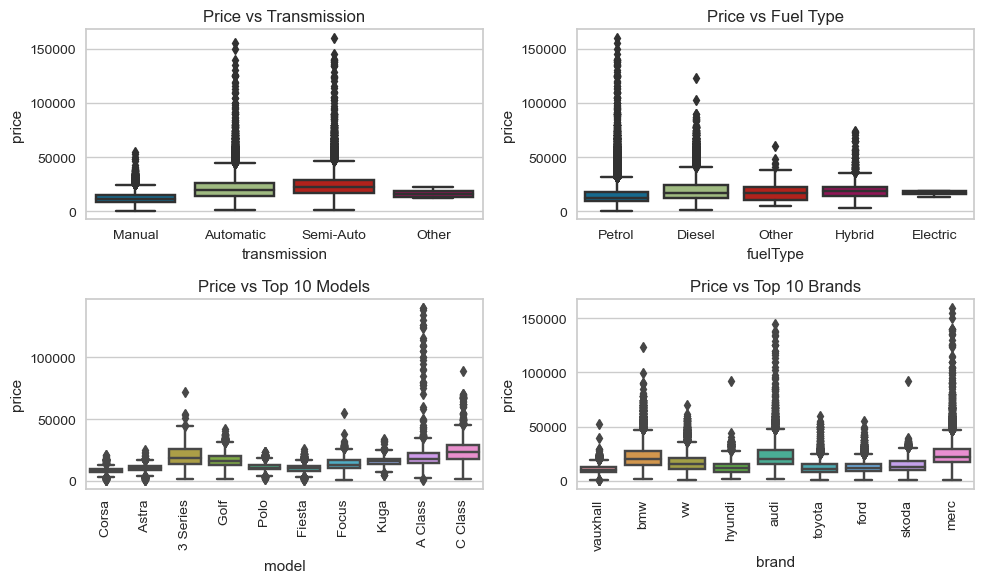

In [66]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Price vs Transmission
sns.boxplot(x='transmission', y='price', data=cars_data, ax=axes[0, 0])
axes[0, 0].set_title('Price vs Transmission')

# Price vs Fuel Type
sns.boxplot(x='fuelType', y='price', data=cars_data, ax=axes[0, 1])
axes[0, 1].set_title('Price vs Fuel Type')

# Price vs Model (top 10 models)
top_10_models = cars_data['model'].value_counts().nlargest(10).index
sns.boxplot(x='model', y='price', data=cars_data[cars_data['model'].isin(top_10_models)], ax=axes[1, 0])
axes[1, 0].set_title('Price vs Top 10 Models')
axes[1, 0].tick_params(axis='x', rotation=90)

# Price vs Source (top 10 sources)
top_10_sources = cars_data['brand'].value_counts().nlargest(10).index
sns.boxplot(x='brand', y='price', data=cars_data[cars_data['brand'].isin(top_10_sources)], ax=axes[1, 1])
axes[1, 1].set_title('Price vs Top 10 Brands')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

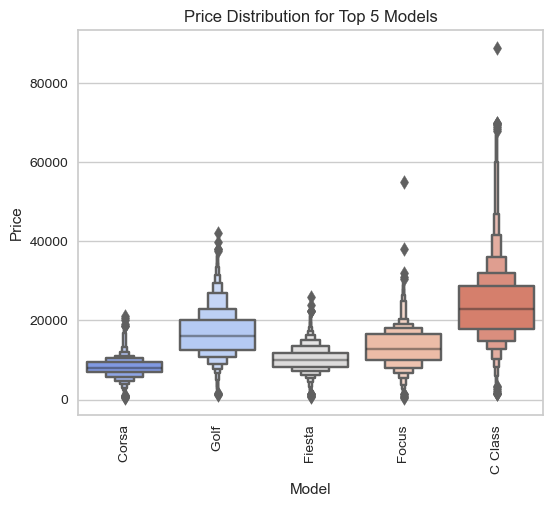

In [67]:
# Boxen plot to show the distribution of prices for different models
top_5_models = cars_data['model'].value_counts().nlargest(5).index

plt.figure(figsize=(6, 5))
sns.boxenplot(x='model', y='price', data=cars_data[cars_data['model'].isin(top_5_models)], palette="coolwarm")
plt.title('Price Distribution for Top 5 Models')
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

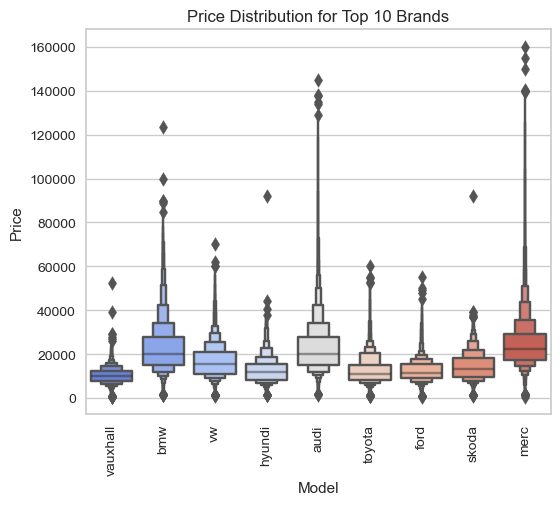

In [68]:
# Boxen plot to show the distribution of prices for different models
top_10_models = cars_data['brand'].value_counts().nlargest(10).index

plt.figure(figsize=(6, 5))
sns.boxenplot(x='brand', y='price', data=cars_data[cars_data['brand'].isin(top_10_models)], palette="coolwarm")
plt.title('Price Distribution for Top 10 Brands')
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Brands for the Model 
Selecting the three more frequent brands int he cardealership for the model: BMW, Toyota, Vauxhall

In [69]:
#Selecting 3 specific brands for the model "BMW", "Toyota", & "vauxhall"
brands = ['toyota', 'bmw', 'vauxhall']
cars_data = cars_data.query('brand in @brands')
cars_data.head(3)

,Obs,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,1,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,vauxhall
1,2,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,vauxhall
2,3,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,vauxhall


### Data Cleaning 

In [70]:
# Remove the obs column 
cars_data=cars_data.drop('Obs',axis=1)

# Setting correct value for the BMW brand
cars_data['model'] = cars_data['model'].str.strip()
cars_data['model'] = cars_data['model'].str.replace(' ','_')

#Setting correct format for the model column
cars_data['model'] = cars_data['model'].astype('str')

cars_data.head(3)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,vauxhall


In [74]:
cars_data['model'].unique(), cars_data['transmission'].unique(), cars_data['fuelType'].unique()

(array(['Corsa', 'Astra', 'Viva', 'Mokka', 'Mokka_X', 'Crossland_X',
        'Zafira', 'Meriva', 'Zafira_Tourer', 'Adam', 'Grandland_X',
        'Antara', 'Insignia', 'Ampera', 'GTC', 'Combo_Life', 'Vivaro',
        'Cascada', 'Kadjar', 'Agila', 'Tigra', 'Vectra', '5_Series',
        '6_Series', '1_Series', '7_Series', '2_Series', '4_Series', 'X3',
        '3_Series', 'X5', 'X4', 'i3', 'X1', 'M4', 'X2', 'X6', '8_Series',
        'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3', 'GT86', 'Corolla',
        'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR', 'Prius', 'Avensis',
        'Verso', 'Hilux', 'PROACE_VERSO', 'Land_Cruiser', 'Supra', 'Camry',
        'Verso-S', 'IQ', 'Urban_Cruiser'], dtype=object),
 array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object),
 array(['Petrol', 'Diesel', 'Other', 'Hybrid', 'Electric'], dtype=object))

### PyCaret Validation & Modeling

In [76]:
s = setup(cars_data, target = 'price', session_id = 123, categorical_features=['brand','model', 'transmission', 'fuelType'])

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(30621, 10)"
4,Transformed data shape,"(30621, 19)"
5,Transformed train set shape,"(21434, 19)"
6,Transformed test set shape,"(9187, 19)"
7,Numeric features,5
8,Categorical features,4
9,Preprocess,True


In [77]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1013.1033,2853042.6583,1681.3858,0.9688,0.1010,0.0710,2.6640
xgboost,Extreme Gradient Boosting,1035.0891,3003349.5445,1725.6573,0.9672,0.1043,0.0724,0.1720
lightgbm,Light Gradient Boosting Machine,1087.1504,3108235.2057,1753.9291,0.9661,0.1070,0.0769,0.2150
rf,Random Forest Regressor,1073.0930,3255275.4620,1798.8297,0.9645,0.1072,0.0752,1.7750
et,Extra Trees Regressor,1105.2912,3452108.5871,1851.4288,0.9622,0.1097,0.0779,1.3050
gbr,Gradient Boosting Regressor,1321.3729,4310990.2396,2069.9380,0.9529,0.1286,0.0934,0.6670
dt,Decision Tree Regressor,1360.3717,5490105.8037,2337.2318,0.9398,0.1377,0.0951,0.1170
knn,K Neighbors Regressor,2121.8857,10835278.8824,3288.6115,0.8815,0.2097,0.1576,0.2040
ridge,Ridge Regression,2269.8755,12484566.4391,3524.7299,0.8637,0.3206,0.1947,0.0810
lr,Linear Regression,2269.9780,12484652.7252,3524.7394,0.8637,0.3203,0.1947,1.1360


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

### Feature Engineering

In [78]:
#Create the Car_age feature
cars_data['car_age'] = 2024 - cars_data['year']

# Create interaction terms (better)
cars_data['mileage_year_interaction'] = cars_data['mileage'] * cars_data['year']

 # Create luxury model indicator (better)
brand_values = {
   'bmw':'1', 
   'toyota':'0', 
   'vauxhall':'0'
}

#Creating the new luxury variable.
cars_data['is_luxury_model'] = cars_data['brand'].map(brand_values)

cars_data.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,car_age,mileage_year_interaction,is_luxury_model
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4,vauxhall,6,19929768,0
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4,vauxhall,5,5047500,0
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4,vauxhall,7,19413625,0


In [81]:
# Initialize PyCaret regression setup with feature engineering
regression_setup = setup(cars_data, session_id = 123, target='price', 
                         categorical_features=['brand','model', 'transmission', 'fuelType'], 
                         ignore_features=['year', 'mileage'])


,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(30621, 13)"
4,Transformed data shape,"(30621, 20)"
5,Transformed train set shape,"(21434, 20)"
6,Transformed test set shape,"(9187, 20)"
7,Ignore features,2
8,Numeric features,5
9,Categorical features,4


In [82]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1085.3544,3110795.9084,1755.0353,0.9661,0.1066,0.0766,0.2110
rf,Random Forest Regressor,1074.4323,3272015.8782,1803.0761,0.9643,0.1073,0.0753,1.7950
et,Extra Trees Regressor,1105.4605,3451199.7601,1851.8664,0.9622,0.1097,0.0778,1.3160
gbr,Gradient Boosting Regressor,1320.4982,4305615.1564,2068.1958,0.9530,0.1284,0.0932,0.6730
dt,Decision Tree Regressor,1362.3690,5586449.3125,2360.3087,0.9388,0.1371,0.0950,0.1250
ada,AdaBoost Regressor,5016.7433,33278942.2965,5760.4926,0.6340,0.4314,0.4779,1.3120
knn,K Neighbors Regressor,4785.6719,47365085.4138,6880.0223,0.4820,0.4298,0.3752,1.2050
dummy,Dummy Regressor,6818.3574,91541809.5530,9563.8201,-0.0004,0.5738,0.5908,0.0770


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

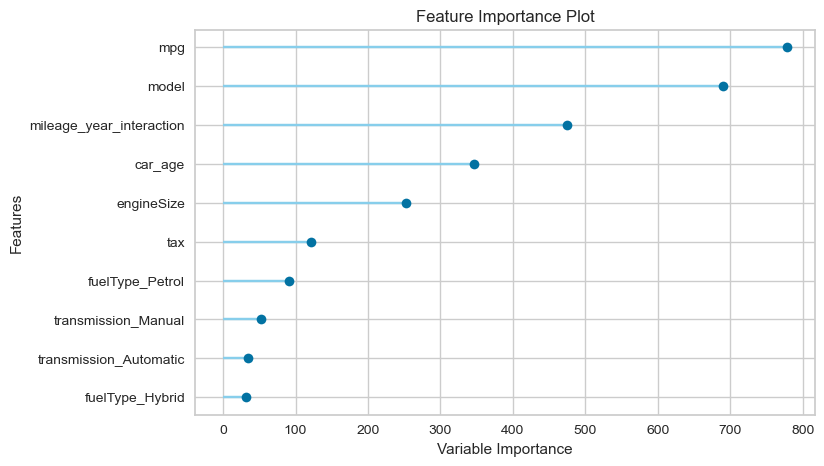

In [83]:
plot_model(best, plot = 'feature')

### Creating the Model 

In [87]:
light_gradboost = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:50:43
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1102.6912,2800356.6635,1673.4266,0.9706,0.1074,0.0780
1,1121.0010,4443907.9495,2108.0579,0.9517,0.1143,0.0806
2,1027.9530,2313687.7355,1521.0811,0.9748,0.0982,0.0727
3,1044.9156,2467246.2525,1570.7470,0.9719,0.1058,0.0771
4,1073.5659,2866695.8590,1693.1320,0.9652,0.1102,0.0762
5,1092.2061,3723663.5618,1929.6797,0.9606,0.1102,0.0756
6,1117.3438,3109229.3984,1763.3007,0.9671,0.1073,0.0773
7,1062.1140,2498264.2520,1580.5898,0.9698,0.1049,0.0776
8,1090.1525,3337402.3646,1826.8559,0.9656,0.1058,0.0761


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tunning the model

In [92]:
light_gradboost= tune_model(light_gradboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1015.8074,2711382.2698,1646.6275,0.9715,0.1049,0.0722
1,1094.1755,4964645.0758,2228.1484,0.9460,0.1111,0.0764
2,1000.7173,2408483.8112,1551.9291,0.9738,0.0941,0.0689
3,982.0979,2394975.8833,1547.5710,0.9727,0.1471,0.0703
4,1011.0148,2740126.2163,1655.3327,0.9667,0.1106,0.0711
5,1042.5035,3608504.3758,1899.6064,0.9619,0.1213,0.0707
6,1047.1439,2900986.6005,1703.2283,0.9693,0.1009,0.0711
7,1004.9988,2362865.5396,1537.1615,0.9714,0.0970,0.0715
8,1032.1927,3481685.4047,1865.9275,0.9641,0.1163,0.0715


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Model Validation

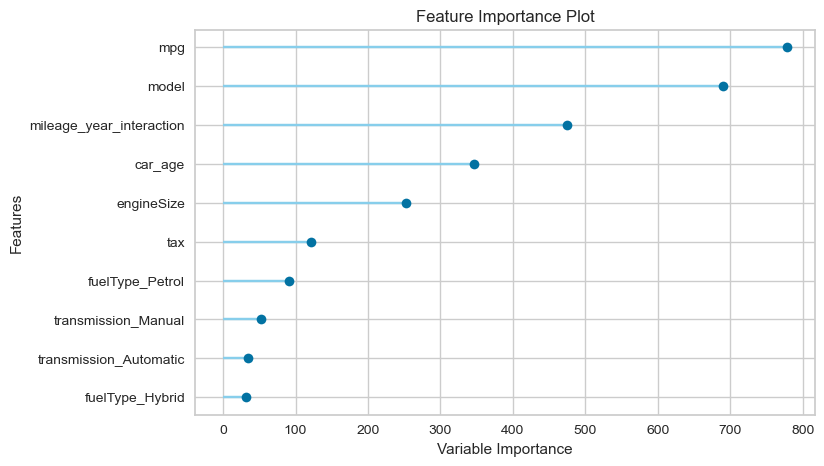

In [97]:
plot_model(light_gradboost, plot = 'feature')

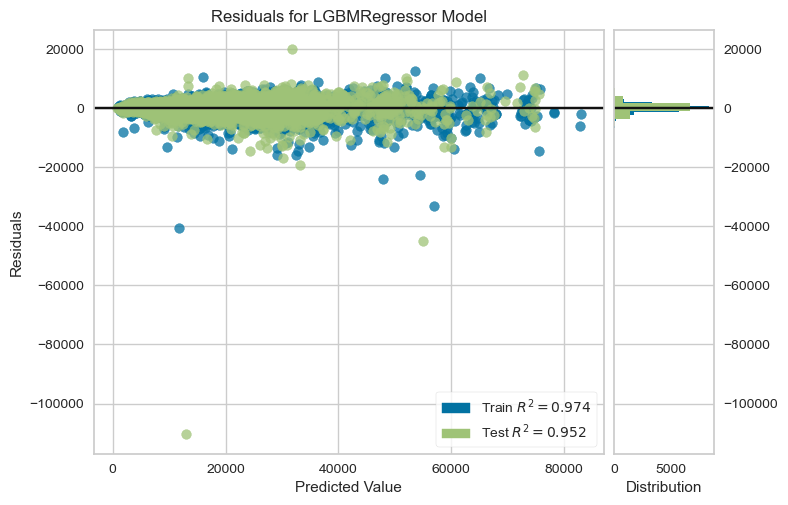

In [93]:
plot_model(light_gradboost)

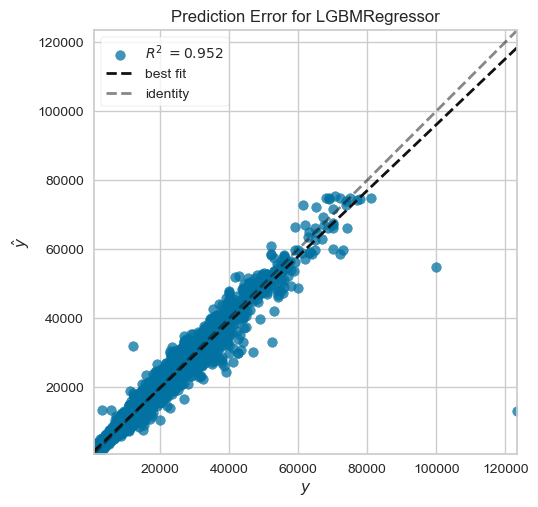

In [94]:
plot_model(light_gradboost, plot = 'error')

In [98]:
evaluate_model(light_gradboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [99]:
predict_model(light_gradboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1100.0531,4327295.6315,2080.2153,0.9522,0.1064,0.0768


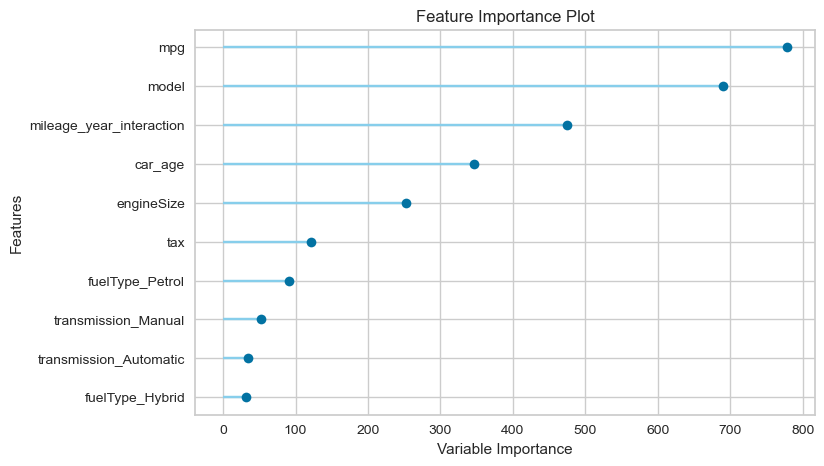

In [114]:
plot_model(light_gradboost, plot = 'feature')

### Executive Dashboard

In [156]:
# Creating the dashborad example
from sre_parse import State
import dash_bootstrap_components as dbc
from dash import Dash, html, dcc, callback, Output, Input,dash_table,ctx
import plotly.express as px
import dash.dash_table.FormatTemplate as FormatTemplate

app = Dash(__name__,external_stylesheets=[dbc.themes.LUX])

colors = {
    'background': '#2c3e50',
    'text': '#FFFFFF',
    'header':'#f39c12',
    'column':'#ADD8E6',
    'text2':'#000000',
}

#Getting the brand values and sorting alphabetically
#brand_values = cars_data.brand.unique()
#brand_values.sort()

brand_values=[
            {'label': 'BMW', 'value': 'bmw'},
            {'label': 'Toyota', 'value': 'toyota'},
            {'label': 'Vauxhall', 'value': 'vauxhall'}
        ]

#Getting the tranmission and sorting alphabetically
transmission_values = cars_data.transmission.unique()
transmission_values.sort()

#Getting the tranmission and sorting alphabetically
year_values = cars_data.car_age.unique()
year_values.sort()

# Fuel Types
fuel_values = cars_data.fuelType.unique()
fuel_values.sort()

#Getting the engine Size
Engine_values = cars_data.engineSize.unique()
Engine_values.sort()

#Setting the Millage Options
Millage_values=[
            {'label': '0 to 10.000', 'value': '1'},
            {'label': '10.000 to 30.000', 'value': '2'},
            {'label': '30.000 to 60.000', 'value': '3'},
            {'label': '60.000 to 100.000', 'value': '4'},
            {'label': '100.000 to Up', 'value': '5'}
        ]

#Display the brand
brand_dropdown = html.Div(
    [
        html.Label("Brand", htmlFor="state-dropdown"),
        dcc.Dropdown(brand_values, 'brand', id='dwnbrand-selection'),
    ],style={'padding': 10, 'flex': 1}
)


#Getting the Model
model_dropdown = html.Div(
    [
       html.Label("Model", htmlFor="state-dropdown"),
       dcc.Dropdown(cars_data.model.unique(), 'model', id='dwnmodel-selection'),
    ],style={'padding': 10, 'flex': 1}
)


#Getting the Transmission
trans_dropdown = html.Div(
    [
       html.Label("Transmission", htmlFor="state-dropdown"),
       dcc.Dropdown(transmission_values, 'transmission', id='dwntransmission-selection'),
    ],style={'padding': 10, 'flex': 1}
)


#Getting the Year
year_dropdown = html.Div(
    [
        html.Label("Car Age", htmlFor="state-dropdown"),
        dcc.Dropdown(year_values,'year',id='cklyear-selection'),
    ],style={'padding': 10, 'flex': 1}
)

#Getting Engine Size
engine_dropdown = html.Div(
    [
       html.Label("Engine Size", htmlFor="state-dropdown"),
        dcc.Dropdown(Engine_values, cars_data.fuelType.unique()[0:2], id='engine-selection')
    ],style={'padding': 10, 'flex': 1}
)

#Getting the Millage Range
millage_dropdown = html.Div(
    [
       html.Label("Millage Range", htmlFor="state-dropdown"),
        dcc.Dropdown(Millage_values, 'millage', id='cklmillage-selection')
    ],style={'padding': 10, 'flex': 1}
)

#Getting the Fuel Type Range
fuel_dropdown = html.Div(
    [
       html.Label("Fuel Type", htmlFor="state-dropdown"),
        dcc.Dropdown(fuel_values, 'millage', id='fuel-selection')
    ],style={'padding': 10, 'flex': 1}
)


exe_button = html.Div([
    html.Br(),
    html.Button('Show Price', id='submit-val', n_clicks=0),
    html.Div(id='button-click-output')
])


graph = dcc.Graph(id='graph-content')
graph2 = dcc.Graph(id='graph-content2')
graph3 = dcc.Graph(id='graph-content3')
graph4 = dcc.Graph(id='graph-content4')


app.layout = dbc.Container(
    [
        dbc.Row([
            html.Br(),
            html.Div(style={'backgroundColor': colors['background']}, children=[
                html.H1(children='Executive Dashboard',style={'textAlign': 'center','color': colors['text']})
            ])
        ]),
        dbc.Row([
        dbc.Col([
             dbc.Row([
                html.Div(style={'backgroundColor': colors['column']}, children=[
                html.H4(children='Variables',style={'textAlign': 'center','color': colors['text2']})])
            ]),
            dbc.Row([
                brand_dropdown
            ]),
             dbc.Row([
                model_dropdown
            ]),
            dbc.Row([
                trans_dropdown
            ]),
            dbc.Row([
                year_dropdown
            ]),
            dbc.Row([
                engine_dropdown
            ]),
            dbc.Row([
                fuel_dropdown
            ]),
            dbc.Row([
                html.I("Mileage"),
                 html.Br(),
                 html.Div(dcc.Input(id='input1', type='text')),
            ]),
            dbc.Row([
                 html.I("Miles per Galon"),
                 html.Br(),
                 html.Div(dcc.Input(id='input2', type='text')),
            ]),
            dbc.Row([
                 html.Br(),
                 html.I("Taxes"),
                 html.Br(),
                 html.Div(dcc.Input(id='input3', type='text')),
            ]),
            dbc.Row([
                exe_button
            ])
        ],width=2,style={'background-color': '#ADD8E6'}),
        dbc.Col([
            dbc.Row([
                 dbc.Col([
                    dash_table.DataTable(
                    id='AVG-header1',
                    columns=[{
                    'id': 'price',
                    'name': 'Predicted Price',
                    'type':'numeric',
                    'format': FormatTemplate.money(0)
                    }
                    ],  style_header={'border': 'none','backgroundColor': '#f39c12', 'color': 'white','font-family':'sans-serif'},style_data={'border': 'none','color': 'white','backgroundColor': '#f39c12'  
                     }, style_cell = {'font_family': 'sans-serif','font_size': '20px','text_align': 'center'}
                    )
                ]),
                dbc.Col([
                    dash_table.DataTable(
                    id='AVG-header2',
                    columns=[{
                    'id': 'tax',
                    'name': 'AVG Tax',
                    'type':'numeric',
                    'format': FormatTemplate.money(0)
                    }
                    ],  style_header={'border': 'none','backgroundColor': '#f39c12', 'color': 'white','font-family':'sans-serif'},style_data={'border': 'none','color': 'white','backgroundColor': '#f39c12'  
                     }, style_cell = {'font_family': 'sans-serif','font_size': '20px','text_align': 'center'}
                    )
                ]),
                dbc.Col([
                    dash_table.DataTable(
                    id='AVG-header3',
                    columns=[{
                    'id': 'mpg',
                    'name': '% Fuel Efficiency',
                    'type':'numeric',
                    'format': FormatTemplate.percentage(2)
                    }
                    ],  style_header={'border': 'none','backgroundColor': '#f39c12', 'color': 'white','font-family':'sans-serif'},style_data={'border': 'none','color': 'white','backgroundColor': '#f39c12'  
                     }, style_cell = {'font_family': 'sans-serif','font_size': '20px','text_align': 'center'}
                    )
                ]),
                dbc.Col([
                   html.Div(style={'backgroundColor': colors['header']}, children=[
                   html.H4(children='',style={'textAlign': 'center','color': colors['text']})])
                ])
            ],style={'background-color':colors['header']}),
            dbc.Row([
                dbc.Col([
                    graph    
                ],width=7),
                dbc.Col([
                    html.Br(),
                    html.Br(),
                    dash_table.DataTable(
                    id='car-value-table',
                    columns=[{
                    'id': 'brand',
                    'name': 'Brand',
                    'type':'text'
                    },
                    {
                    'id': 'model',
                    'name': 'Model',
                    'type':'text'
                    },
                    {
                    'id': 'year',
                    'name': 'Year',
                    'type':'text'
                    },
                    {
                    'id': 'price',
                    'name': 'Price',
                    'type':'numeric',
                    'format': FormatTemplate.money(0)
                    },
                    {
                    'id': 'tax',
                    'name': 'Tax',
                    'type':'numeric',
                    'format': FormatTemplate.money(0)
                    },
                    {
                    'id': 'mpg',
                    'name': 'MPG',
                     'type':'text'
                    }
                    ],
                    data=cars_data.to_dict('records')
                    ,editable=True,page_size= 10,sort_mode='single',style_cell={'height': 'auto','minWidth': '80px','textAlign': 'center'},
                     style_header={
                        'backgroundColor': '#2c3e50' ,
                        'fontWeight': 'bold',
                        'color':'white'
                     }, 
                     style_data={
                    'color': 'black',
                    'backgroundColor': 'white'  
                     },
                    )
                ],width=3),
            ]),
            dbc.Row([
                 dbc.Col([
                     graph4
                 ],width=6),
                 dbc.Col([
                    graph3
                 ],width=6)
            ])
        ]),
            
        #dbc.Row([dbc.Col(graph3)]),  
        #dbc.Col([dbc.Button("row 1 col 2", style={"width": "100%"})],width=3),
        #dbc.Col([dbc.Button("row 1 col 3",style={"width":"100%"})],width=3),
        #dbc.Col([dbc.Button("row 1 col 4",style={"width":"100%"})],width=3),
        ]),
        
        #dbc.Col(brand_dropdown,width=2),
        #dbc.Col(model_dropdown,width=2),
        #dbc.Row([dbc.Col(graph2)]),
    ],
    fluid=True,
)


@callback(
    Output('AVG-header2', 'data'),
    Input('dwnbrand-selection', 'value'),
    Input('dwnmodel-selection', 'value'),
    Input('dwntransmission-selection', 'value'),
    Input('cklyear-selection', 'value'),
    Input('fuel-selection', 'value')
)

def update_table2(dwnbrand_selection_value,dwnmodel_selection_value,dwntrans_selection_value,cklyear_selection_value,cklgas_selection_name):
    cars_data1 = cars_data[(cars_data.brand==dwnbrand_selection_value)]
    cars_data1 = cars_data1[(cars_data1.model==dwnmodel_selection_value)]
    cars_data1 = cars_data1[(cars_data1.transmission==dwntrans_selection_value)]
    cars_data1 = cars_data1[(cars_data1.car_age==cklyear_selection_value)]        
    totalValue= cars_data1.groupby(['brand','transmission','car_age']).mean(['tax'])
    return totalValue.to_dict('records')

@callback(
    Output('AVG-header3', 'data'),
    Input('dwnbrand-selection', 'value'),
    Input('dwnmodel-selection', 'value'),
    Input('dwntransmission-selection', 'value'),
    Input('cklyear-selection', 'value'),
    Input('fuel-selection', 'value')
)

def update_table3(dwnbrand_selection_value,dwnmodel_selection_value,dwntrans_selection_value,cklyear_selection_value,cklgas_selection_name):
    cars_data1 = cars_data[(cars_data.brand==dwnbrand_selection_value)]
    cars_data1 = cars_data1[(cars_data1.model==dwnmodel_selection_value)]
    cars_data1 = cars_data1[(cars_data1.transmission==dwntrans_selection_value)]
    cars_data1 = cars_data1[(cars_data1.car_age==cklyear_selection_value)]        
    # get the values and set the value fopr good efficiency to 50 mpg
    tPercentage = 0
    test1 = cars_data1.shape[0]
    count_good=0
    for i in range(len(cars_data1)):
        good =cars_data1.iloc[[i],[7]].values[0,0]
        if(good > 50):
            count_good=count_good+1   
                
    
    totalValue= cars_data1.groupby(['brand','transmission','car_age']).mean(['price'])
    
    if (test1 > 0):
        tPercentage=count_good/test1
        
    totalValue['mpg']=tPercentage
    return totalValue.to_dict('records')



@callback(
    Output('car-value-table', 'data'),
    Input('dwnbrand-selection', 'value'),
    Input('dwnmodel-selection', 'value'),
    Input('dwntransmission-selection', 'value'),
    Input('cklyear-selection', 'value'),
    Input('fuel-selection', 'value')
)


def update_table(dwnbrand_selection_value,dwnmodel_selection_value,dwntrans_selection_value,cklyear_selection_value,cklgas_selection_name):
    cars_data1 = cars_data[(cars_data.brand==dwnbrand_selection_value)]
    cars_data1 = cars_data1[(cars_data1.model==dwnmodel_selection_value)]
    cars_data1 = cars_data1[(cars_data1.transmission==dwntrans_selection_value)]
    cars_data1 = cars_data1[(cars_data1.car_age==cklyear_selection_value)]
    return cars_data1.to_dict('records')
    

@callback(
    Output('graph-content', 'figure'),
    Input('dwnbrand-selection', 'value'),
    Input('dwnmodel-selection', 'value'),
    Input('dwntransmission-selection', 'value'),
    Input('cklyear-selection', 'value'),
    Input('fuel-selection', 'value')
   
)


def update_graph(dwnbrand_selection_value,dwnmodel_selection_value,dwntrans_selection_value,cklyear_selection_value,cklgas_selection_name):
    cars_data1 = cars_data[(cars_data.brand==dwnbrand_selection_value)]
    cars_data1 = cars_data1[(cars_data1.model==dwnmodel_selection_value)]
    cars_data1 = cars_data1[(cars_data1.transmission==dwntrans_selection_value)]   
    cars_data1 = cars_data1[(cars_data1.car_age==cklyear_selection_value)]   
    #fig = px.histogram(cars_data1, x='age', y='price', histfunc='avg')
    fig = px.histogram(cars_data1, x='price', nbins=20,text_auto=True)
    #fig.update_traces(xbins_size="model")
    fig.update_layout(bargap=0.2)
    return fig    
    
@callback(
    Output('graph-content3', 'figure'),
    Input('dwnbrand-selection', 'value'),
    Input('dwnmodel-selection', 'value'),
    Input('dwntransmission-selection', 'value'),
    Input('cklyear-selection', 'value'),
    Input('fuel-selection', 'value')
   
)

def update_graph3(dwnbrand_selection_value,dwnmodel_selection_value,dwntrans_selection_value,cklyear_selection_value,cklgas_selection_name):
    cars_data1 = cars_data[(cars_data.brand==dwnbrand_selection_value)]
    cars_data1 = cars_data1[(cars_data1.model==dwnmodel_selection_value)]
    cars_data1 = cars_data1[(cars_data1.transmission==dwntrans_selection_value)]
    cars_data1 = cars_data1[(cars_data1.car_age==cklyear_selection_value)]
    #cars_data1 = cars_data1[cars_data1.fuelType.isin(cklgas_selection_name)]
    #cars_data1 = cars_data1[cars_data1.transmission.isin(ckltrans_selection_name)]
    #audi_data1 = audi_data[(audi_data.model==dwnmodel_selection_value)]
    #fig = px.line(cars_data1.query("(year >= 2015) & (year <= 2016)"), x='year', y='price')
    #fig = px.line(cars_data1, x='year', y='price')
    fig =  px.sunburst(cars_data1, path=['transmission','model','car_age'], values='mpg')
    
    return fig

@callback(
    Output('graph-content4', 'figure'),
    Input('dwnbrand-selection', 'value'),
    Input('dwnmodel-selection', 'value'),
    Input('dwntransmission-selection', 'value'),
    Input('cklyear-selection', 'value'),
    Input('fuel-selection', 'value')
   
)

def update_graph4(dwnbrand_selection_value,dwnmodel_selection_value,dwntrans_selection_value,cklyear_selection_value,cklgas_selection_name):
    cars_data1 = cars_data[(cars_data.brand==dwnbrand_selection_value)]
    cars_data1 = cars_data1[(cars_data1.transmission==dwntrans_selection_value)]
    cars_data1 = cars_data1[(cars_data1.model==dwnmodel_selection_value)]
    cars_data1 = cars_data1[(cars_data1.car_age==cklyear_selection_value)]
    #totalValue= cars_data1.groupby(['brand']).mean(['mpg'])
    #fig = px.line(cars_data1.query("(year >= 2015) & (year <= 2016)"), x='year', y='price')
    #fig = px.box(cars_data1, x='brand', y='mpg')
    #fg = px.scatter(cars_data1, x='price',y='mpg',color='brand')
    fig = px.scatter(cars_data1, x='price', y='mpg',color='mpg')
    #fig =  px.sunburst(cars_data1, path=['Country', 'model','year'], values='tax'
    return fig

@callback(
    Output('dwnmodel-selection', 'options'),
    [Input('dwnbrand-selection', 'value')]
)
def update_dropdown(selected_value):
    model1 = cars_data[(cars_data['brand']==selected_value)]
    options = [{'label': name, 'value': name} for name in model1['model'].unique()]
    return options

@callback(
    Output('AVG-header1', 'data'),
    Input('dwnbrand-selection', 'value'),
    Input('dwnmodel-selection', 'value'),
    Input('dwntransmission-selection', 'value'),
    Input('cklyear-selection', 'value'),
    Input('engine-selection', 'value'),
    Input('fuel-selection', 'value'),
    Input('input1', 'value'),
    Input('input2', 'value'),
    Input('input3', 'value'),
    Input('submit-val', 'n_clicks'),
    prevent_initial_call=True
)
def displayClick(dwnbrand_selection_value,dwnmodel_selection_value,dwntrans_selection_value,cklyear_selection_value,engine_selection_value,fuel_selection_value,miles_select_value,miles_galon,tax_value,n_clicks):
    #cars_data1 = cars_data[(cars_data.brand==dwnbrand_selection_value)]
    #cars_data1 = cars_data1[(cars_data1.model==dwnmodel_selection_value)]
    #cars_data1 = cars_data1[(cars_data1.transmission==dwntrans_selection_value)]
    #cars_data1 = cars_data1[(cars_data1.car_age==cklyear_selection_value)] 
    #cars_data1 = cars_data1[(cars_data1.engineSize==engine_selection_value)]        
    #totalValue= cars_data1.groupby(['brand','transmission','car_age']).mean(['price'])
    luxury='0'
    if cklyear_selection_value == 'year':
        year= 2024
    else:
        year = 2024 - int(cklyear_selection_value)

    if miles_select_value is None:
        miles_year=0
    else:
        miles_year= int(miles_select_value) * year

    if (dwnbrand_selection_value =='bmw'):
            luxury ='1'
    
    test={
        'model': [dwnmodel_selection_value],
        'transmission': [dwntrans_selection_value],
        'fuelType': [fuel_selection_value],
        'tax': [tax_value],
        'mpg': [miles_galon],
        'engineSize': [engine_selection_value],
        'brand': [dwnbrand_selection_value],
        'car_age': [cklyear_selection_value],
        'mileage_year_interaction': [miles_year],
        'is_luxury_model': [luxury]
        }

    df = pd.DataFrame(test)  

    msg=[]
    if "submit-val" == ctx.triggered_id:

        #df['mileage_year_interaction']=0
        prediction = predict_model(light_gradboost, data=df)
        price = prediction.loc[0,'prediction_label']
        final={
        'price': [price]
        }
        df2 = pd.DataFrame(final)
        msg=df2.to_dict('records')
    return msg


if __name__ == '__main__':
    app.run_server(debug=True,port=8077)